<a href="https://colab.research.google.com/github/Priya-ch0udhary/Gender-detection-CNNmodel/blob/master/Gender_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')  


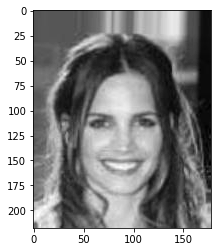

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
DATADIR = os.path.dirname(os.path.abspath("gdrive/My Drive/Images/*"))
CATEGORIES = ["Female", "Male"]

for category in CATEGORIES :
    path = os.path.join(DATADIR, category)   #path to male and female
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      plt.imshow(img_array, cmap = "gray")
      plt.show()
      break
    break

In [0]:
print(img_array.shape)

In [0]:
IMG_SIZE = 100
new_Array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_Array, cmap = "gray")
plt.show()

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES :
      path = os.path.join(DATADIR, category)   #path to male and female
      class_num = CATEGORIES.index(category)   #index: 0 for female, 1 for male
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
          new_Array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_Array, class_num])
        except Exception as e:
          pass
create_training_data()


In [8]:
print(len(training_data))

2931


In [0]:
import random
random.shuffle(training_data)

In [0]:
for sample in training_data[:10]:
  print(sample[1])

In [0]:
X = []
y = []

In [0]:
import numpy as np

for features, label in training_data:
  X.append(features)
  y.append(label)

#converting into numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   #1=grayscale, 3=color



In [0]:
import pickle 
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [0]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.callbacks import TensorBoard
import time

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

#normalising data :min = 0,  max=255, so divide by 255

X = X/255.0

dense_layers =[0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in conv_layers:
      NAME = "{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer, int(time.time()))
      print(NAME)
      
      model = Sequential()
      
      model.add(Conv2D(layer_size, (3, 3), input_shape = X.shape[1:]))
      model.add(Activation("relu"))
      model.add(MaxPooling2D(pool_size = (2, 2)))
      

      for l in range(conv_layer-1):
          model.add(Conv2D(layer_size, (3, 3)))
          model.add(Activation("relu"))
          model.add(MaxPooling2D(pool_size = (2, 2)))
          
      model.add(Flatten())  #this converts our 3D features maps to 1D features
      
      
      for l in range(dense_layer):
        model.add(Dense(16))
        model.add(Activation("relu"))
        model.add(Dropout(0.6))
        
          
      model.add(Dense(1))
      model.add(Activation("sigmoid"))
      
      tensorboard = TensorBoard(log_dir = "logs/{}".format(NAME))

      model.compile(loss = "binary_crossentropy",
                   optimizer = "adam",
                   metrics = ["accuracy"])
      model.fit(X,y, 
                batch_size = 100,
                epochs = 10, 
                validation_split = 0.2, 
                callbacks = [tensorboard])

model.save("64x3-CNN.model") 

In [0]:
model.summary()

In [34]:
import cv2
import tensorflow as tf

CATEGORIES = ["Female", "Male"]

def prepare(filepath):
  IMG_SIZE = 100
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare("/content/gdrive/My Drive/Test/202597.jpg")])
print(prediction)

[[1.]]


In [35]:
prediction = model.predict([prepare("/content/gdrive/My Drive/Test/202588.jpg")])
print(CATEGORIES[int(prediction[0][0])])

Male
